## Project Part B: Customer Churn Prediction

##### Here is my video link below ⬇.

https://drive.google.com/file/d/1mc3tY4__IzYJMWfaZShckzYSB6gRT5Wn/view?usp=sharing


Objective: Customer churn, or customer attrition, refers to when a customer ceases their relationship with a company or service provider. This project aims to build a machine learning model that can predict whether a customer will churn based on their demographic, account, and service-related data.


Problem Statement:
The goal of this project is to develop a classification model that predicts whether a customer will churn. Using demographic data (such as gender, senior citizen status, and tenure), along with information about the services they use (such as internet service, phone service, and online security).
By predicting customer churn, the company can proactively design retention strategies to keep these customers, thereby improving customer satisfaction and reducing financial loss.


#### **1. Importing Libraries and Packages**

In [1]:
# For Analysis
import numpy as np
import pandas as pd


# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For Feature Selection
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For Modeling
from sklearn.model_selection import train_test_split

#For Validation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

#### **2. Loading & Analysing Customer Churn Prediction dataset**



In [2]:
# Load the dataset

df = pd.read_csv('/content/drive/MyDrive/Customer_data.csv')

df.head(5)        # Top rows of dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Summary Statistics of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df['TotalCharges'].fillna(0, inplace=True)  # Fill with 0


In [7]:
#check for the duplicates

df.duplicated().sum()  #print the number of duplicate rows in the data

0

In [8]:
# Fill missing values with the median for numerical columns
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

### **3. Visualize different plot (such as count plot, hist plot, box plot) to show the relationship between variables of Customer Churn Data**

### **Counting a Churn and Non-Churn in the data.**



In [9]:
#check whether the data is balanced or imbalanced
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


### **Plotting a count plot to show the distribution of churn & non-churn.**

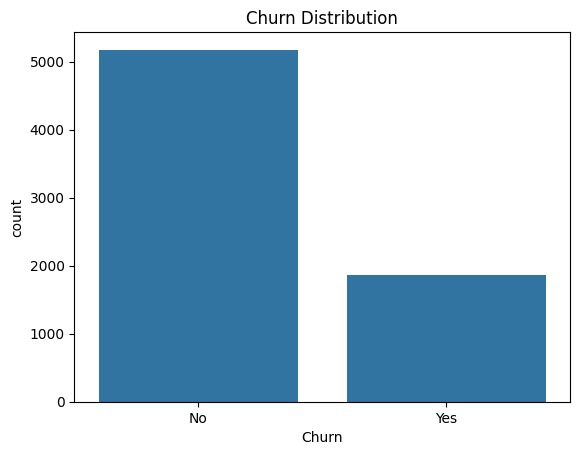

In [ ]:
# Plot the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


Summary of Churn Distribution Chart:


* The bar plot visualizes the distribution of customer churn.

* "No" (Non-churned customers): ~5100 customers.
* "Yes" (Churned customers): ~1900 customers.


* The dataset is imbalanced, with a higher proportion of non-churned customers compared to churned ones.

#### **Histogram plot to show the distribution of Tenure by Churn**

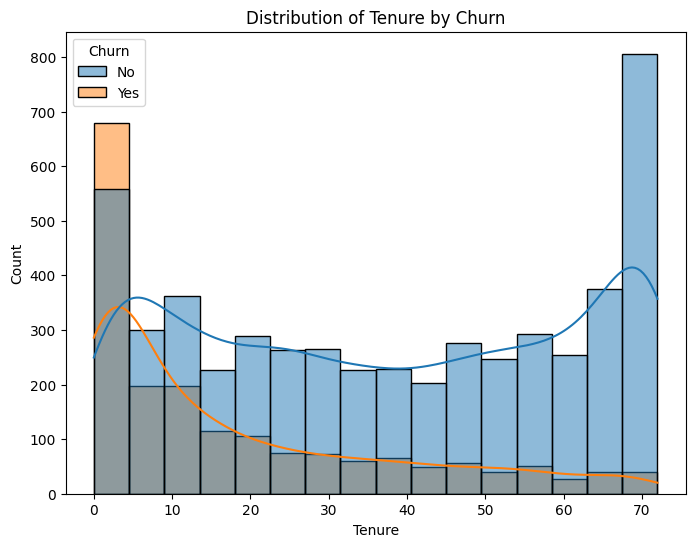

In [10]:
# Distribution of Tenure by Churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()


Summary of Tenure Distribution by Churn:
*   Short tenure customers (0-10 months) have a higher churn rate, with ~700 churned users at the start.

*  Longer tenure customers (above 60 months) have a lower churn rate, with ~800 non-churned users at 70 months.

*   As customers stay longer, they are less likely to leave. This means that most people who cancel do so early on. To reduce churn, businesses should focus on keeping new customers happy in the first few months.


#### **Box plot to show the outliers**

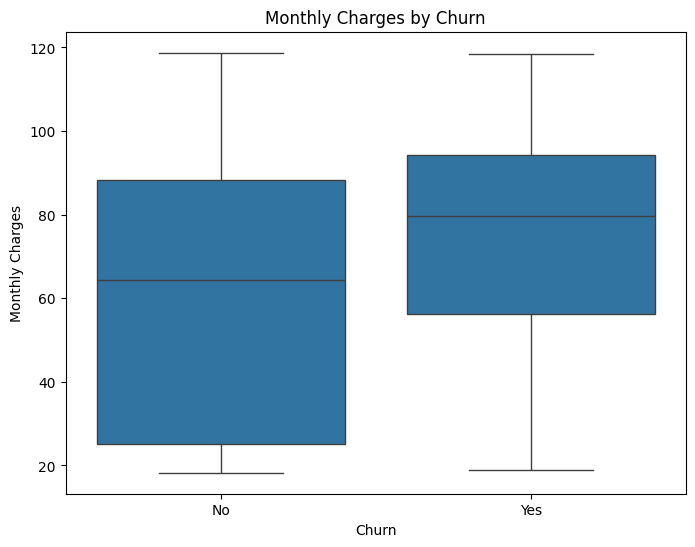

In [11]:
# Boxplot for the Monthly Charges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Summary of Monthly Charges by Churn


The median monthly charge for customers who did not churn is around $$65, while for those who churned, it's higher, around $80-$85.

*  This indicates that customers with higher monthly charges are more likely to leave.



### **Scatter plot for two continuous variables**




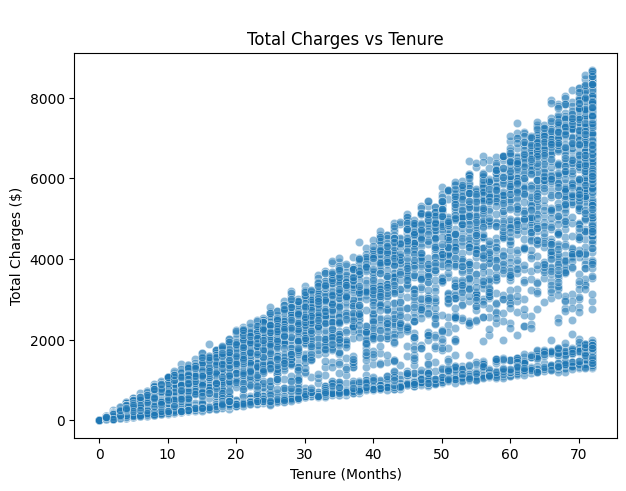

In [12]:
# Scatterplot to show the Total Monthly Charges by Churn
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], alpha=0.5)
plt.title("\nTotal Charges vs Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Charges ($)")
plt.show()


Summary of Scatterplot Total Charges Vs Tenure


*   The total charges increase as tenure increases, showing a strong positive relationship. Customers who stay longer tend to pay more over time.


### **Correlation Matrix**

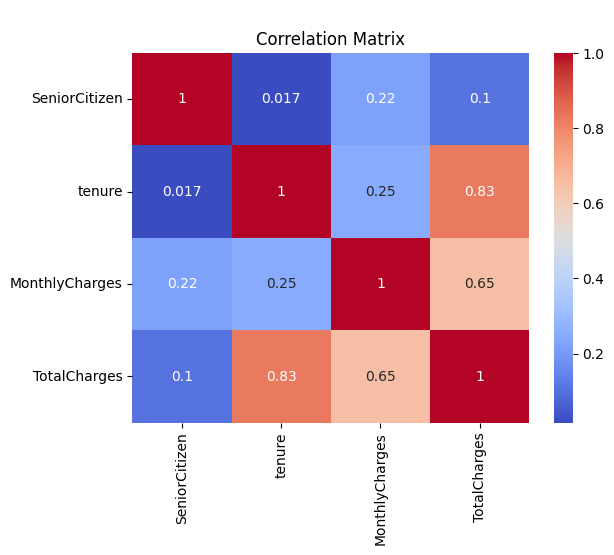

In [13]:
num_cols = list()
for column in df.columns:
  if df[column].dtype != 'object':
    num_cols.append(column)
Correlation_matrix = df[num_cols].corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm')
plt.title('\nCorrelation Matrix')
plt.show()

Summary of Correlation Matrix:

Tenure and total charges have a strong positive correlation (0.83), meaning longer tenure leads to higher total charges. Monthly charges also correlate well with total charges (0.65). Other features show weak correlations.

### **4. Data Preprocessing**

In [14]:
# Encode Categorical Variables
label_encoders = {}
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
# Features and Scaling
X = df.drop(['customerID','Churn'], axis=1)
y = df['Churn']

In [58]:
# Select the 6 features you want to use for prediction
X = df[['gender', 'SeniorCitizen', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']


In [63]:
X.head()

,gender,SeniorCitizen,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0,0,2,1,29.85,29.85
1,1,0,3,34,56.95,1889.50
2,1,0,3,2,53.85,108.15
3,1,0,0,45,42.30,1840.75
4,0,0,2,2,70.70,151.65


In [18]:
# Split data into training & testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)


In [19]:
# Standardize the Feature Scaling
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [20]:
X_train

array([[ 0.99433624, -0.44177295,  0.40093316,  0.10237124, -0.52197565,
        -0.2622572 ],
       [ 0.99433624, -0.44177295,  1.33627784, -0.71174346,  0.33747781,
        -0.50363479],
       [ 0.99433624, -0.44177295,  1.33627784, -0.79315493, -0.80901319,
        -0.74988292],
       ...,
       [-1.00569602,  2.2636062 ,  1.33627784, -0.30468611,  1.25666162,
         0.15834357],
       [-1.00569602, -0.44177295, -0.53441153, -0.34539184, -1.47766135,
        -0.79707463],
       [ 0.99433624, -0.44177295,  1.33627784, -1.07809507, -1.46936546,
        -0.96096216]])

### **5. Apply Logistic Regression on Customer Churn Data.**

In [21]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model using only the 6 features

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Predicitons on the test data
logreg_pred = logreg.predict(X_test)

#Accuracy and performance metrics
logreg_accuracy = accuracy_score(y_test, logreg_pred)


In [52]:
# Display accuracy & Performance matrics
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}%')
print(f'\nLogistic Regression Classification Report: ')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 78.14%

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.62      0.44      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



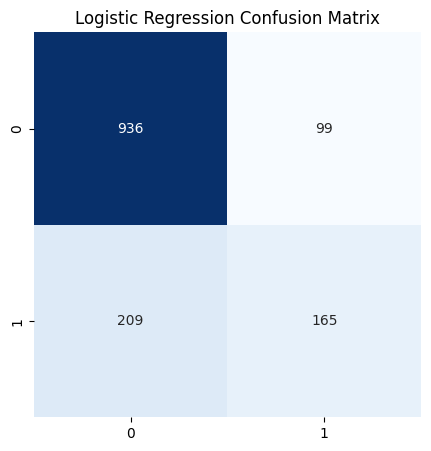

In [23]:
# Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.show()


```
# Summary of Confusion Matrix
```
The model correctly predicted 936 non-churn cases and 165 churn cases. However, it misclassified 76 non-churn cases as churn and 197 churn cases as non-churn.

### **Insert some input values according to the user to test whether it is churn or not.**

In [24]:
# User input values
gender = float(input("Enter Gender (0 for Female, 1 for Male): "))
SeniorCitizen = float(input("Enter Senior Citizen Status (0 for No, 1 for Yes): "))
Partner = float(input("Enter Partner Status (0 for No, 1 for Yes): "))
tenure = float(input("Enter tenure (in months): "))
monthly_charges = float(input("Enter Monthly Charges: "))
total_charges = float(input("Enter Total Charges: "))

# Convert input to 2D array
user_input = np.array([[gender, SeniorCitizen, Partner, tenure, monthly_charges, total_charges]])

# Apply scaling before prediction
user_input_scaled = Scaler.transform(user_input)

# Predict churn
predicted_churn = logreg.predict(user_input_scaled)

# Output prediction
print(f'Predicted Churn: {"Yes" if predicted_churn[0] == 1 else "No"}')


Enter Gender (0 for Female, 1 for Male): 1
Enter Senior Citizen Status (0 for No, 1 for Yes): 1
Enter Partner Status (0 for No, 1 for Yes): 0
Enter tenure (in months): 90.4
Enter Monthly Charges: 89.2
Enter Total Charges: 1200
Predicted Churn: No


Churn Prediction:

The logistic regression model (logreg) predicts whether the customer will churn ("Yes") or stay ("No").

Output Display:

The result is printed, showing "Yes" if the model predicts churn (1) or "No" otherwise.

According to the user input-

A Male senior citizen with no partner, 90.4 months of tenure, $$89.2 in monthly charges, and $1200 in total charges is predicted not to churn.



### **5. Apply Random Forest Classification on the Customer Churn Data**



In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = rf_model.predict(X_test)

In [28]:
#Evalute the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.08%



We should never use `accuracy_score` inthe case of imbalanced data. We should instead use roc_auc_score dealing with imbalamced data.




In [29]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (churn)

roc_auc_score(y_test, y_pred_proba)

0.7906920871115245

In [32]:
#Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1035
         Yes       0.59      0.46      0.52       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



In [33]:
#print confusion matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix: 
[[913 122]
 [201 173]]


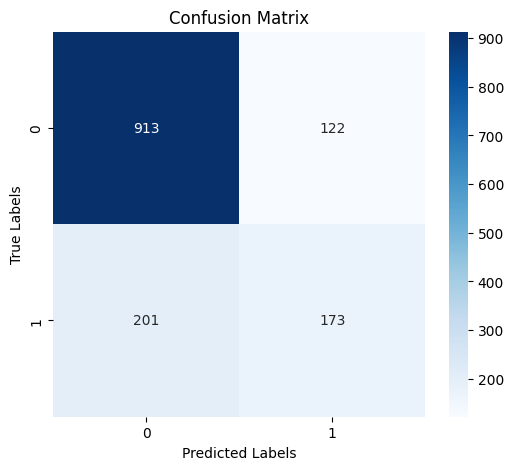

In [34]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



```
# Summary of Confusion Matrix
```
The model correctly predicted 913 non-churn cases and 173 churn cases. However, it misclassified 76 non-churn cases as churn and 197 churn cases as non-churn.

#### **6. Apply Decison Tree on the Customer Churn Data**

### **Importing Decision Tree Packages**

In [55]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [36]:
dec_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [37]:
from sklearn import tree

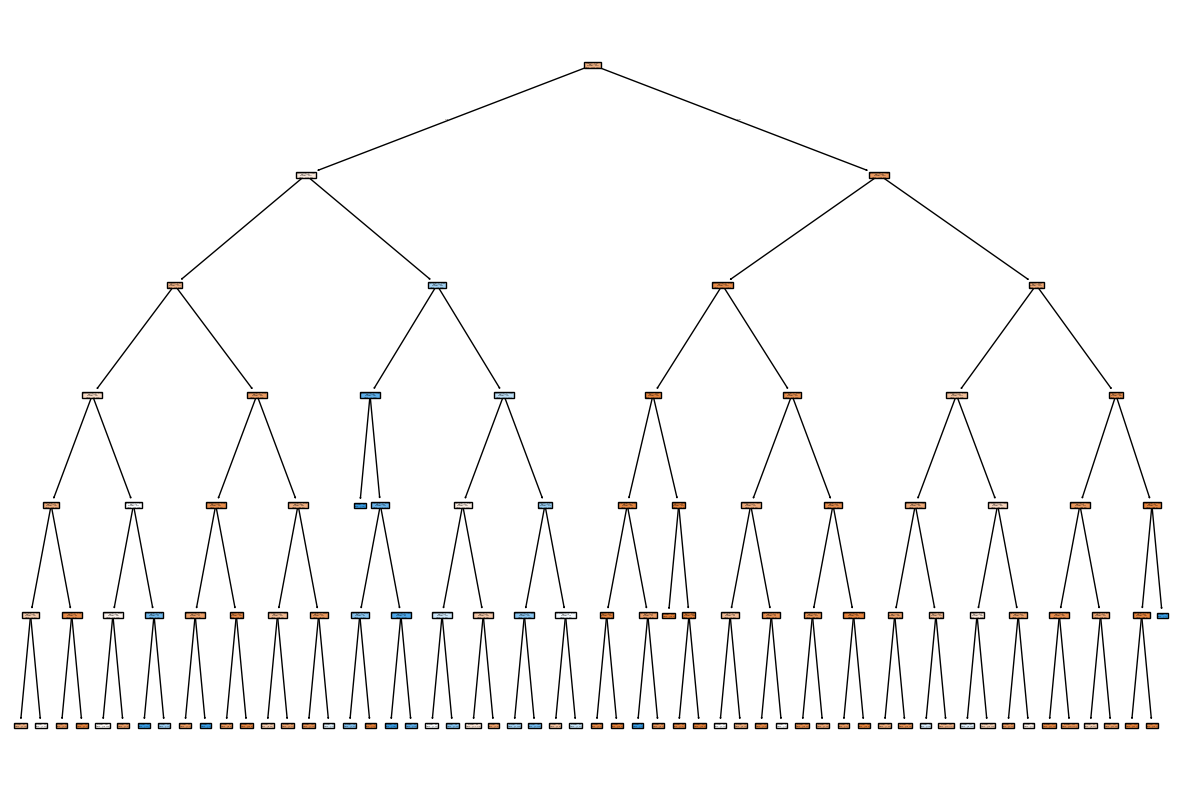

In [38]:
fig = plt.figure(figsize= (15,10))

#code to draw the tree
fig = tree.plot_tree(dec_tree, feature_names=X.columns, filled=True)
plt.savefig('tree.png')


In [39]:
dec_tree.get_depth()

6

In [40]:
y_pred = dec_tree.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.7856635911994322

**To identify the overfiiting issue**

In [42]:
y_pred_train = dec_tree.predict(X_train)

In [43]:
accuracy_score(y_train, y_pred_train)

0.8003194888178914



```
# Summary
```
**For Depth = 1**
Test = 0.7345
Train = 0.7346

**For Depth = 2**
Test = 0.7806
Train = 0.7850

**For Depth 3**
Test = 0.7806
Train = 0.7850

**For Depth = 4**
Test = 0.7828
Traini= 0.7889

**For Depth = 5**
Test = 0.7892
Train = 0.7949

**For Depth = 6**
Test = 0.7856
Train = 0.8003

**For Depth =7**
Test= 0.7877
Train = 0.851

**Depth = 8**
Test = 0.7870
Train =  0.8283

**Depth = 9**
Test = 0.76153
Train = 0.84700

**Depth = 10**
Test = 0.7565
Train = 0.8686

After performing different **max_depths**, I found that the range from 5 to 6 provides the best performance of the model, while the range from 1 to 4 indicates that the model is **underfitting** and above 6, the model starts to experience **overfitting** issues.

In [44]:
#Print classification report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1035
         Yes       0.63      0.45      0.53       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



### **7. Performing Hyperparameter tuning using gridsearch CV**

In [45]:
#Grid Search CV

In [53]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}

In [56]:

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=5) # cv=5 for 5-fold cross-validation
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_dec_tree = grid_search.best_estimator_
y_pred_grid = best_dec_tree.predict(X_test)

print(f'\nDecision Tree (after GridSearchCV) Accuracy: {accuracy_score(y_test, y_pred_grid)*100:.2f}')
print(classification_report(y_test,y_pred_grid))


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best score: 0.7850531362440722

Decision Tree (after GridSearchCV) Accuracy: 77.93
              precision    recall  f1-score   support

          No       0.81      0.91      0.86      1035
         Yes       0.62      0.43      0.51       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.76      0.78      0.76      1409



### **Confusion Matrix**

[[939  96]
 [215 159]]


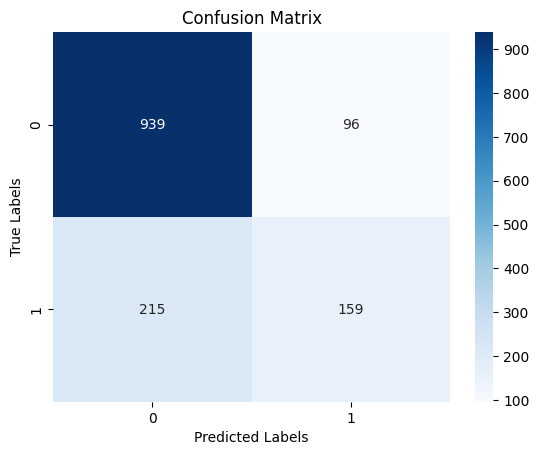

In [49]:
print(confusion_matrix(y_test, y_pred_grid))

sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



```
# Summary of Confusion Matrix
```
The model correctly predicted 939 non-churn cases and 159 churn cases. However, it misclassified 76 non-churn cases as churn and 197 churn cases as non-churn.

### **Comparing all three algorithms to find the best one.**

In [47]:
#Summary of Accuracies
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Random Forest': accuracy,
    'Decision Tree': accuracy_score(y_test, y_pred)
}

#Display the accuracies
for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy * 100:.2f}%')

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print('\nbest_model:', best_model)

Logistic Regression Accuracy: 78.14%
Random Forest Accuracy: 77.08%
Decision Tree Accuracy: 78.57%

best_model: Decision Tree




```
# Summary
```

After performing all the three algorithms (Logistic Regression, Random Forest, Decision Tree). I found that Decision Tree are best model to predict the Customer Churn and it is giving 78.57% accuracy which is higher than others.

## **8. Some Key points Takeaways from the Model's Performance**

### Model Accuracy: 78.57%
1. The model correctly identifies most customers who will stay.
2. It struggles slightly with correctly predicting churn cases (some churners are misclassified as non-churners).

### Customers with Higher Monthly Charges (~$80+):

1. Higher bills increase the likelihood of churn.
2. Customers who pay less per month are more stable.

### Customers with Specific Payment Methods:

Customers using electronic checks have a higher churn rate.
Those using credit cards or bank transfers are more loyal.

### Actionable Insights to Reduce Churn
1. The highest churn rate occurs in the first 10 months.
2. Provide special offers or discounts for new customers in the first year.
3. Assign personalized support (calls/emails) to new customers.

### Adjust Pricing & Offer Flexible Plans
1.  Customers with higher monthly charges are more likely to churn.
2. Offer discounts or add-ons to customers at risk of churn.
3. Provide a custom pricing calculator where customers can adjust features based on their budget.


